In [1]:
import matplotlib.pyplot as plt
import imageio
import numpy as np
import os

### Image segments

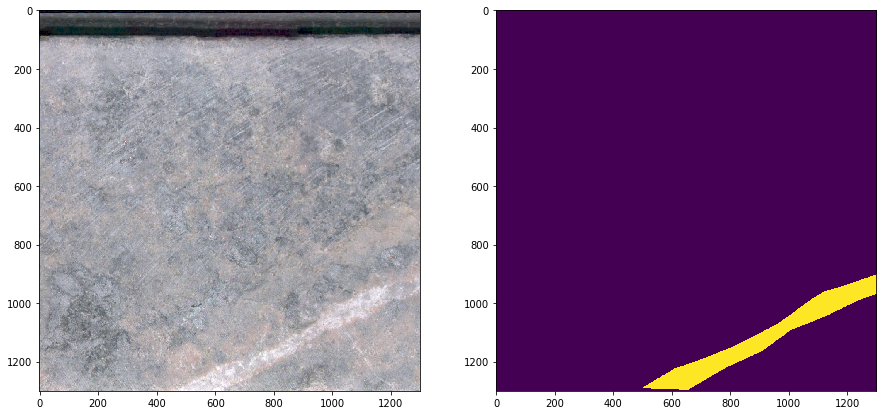

In [2]:
image = imageio.imread('/data/vein/augmented/12-jun-ratio-20-1/images/UE118_0004_01_inst_0_seg_3_orig.png')
mask = imageio.imread('/data/vein/augmented/12-jun-ratio-20-1/masks/UE118_0004_01_inst_0_seg_3_orig.png')
f, axarr = plt.subplots(nrows=1, ncols=2)
f.set_figheight(10)
f.set_figwidth(15)
_ = axarr[0].imshow(image)
_ = axarr[1].imshow(mask)

In [3]:
import glob
augmented_directory = '/data/vein/augmented/12-jun-ratio-20-1'

In [4]:
# load all the augmented file names
image_file_list = glob.glob("{}/images/*_augm_*.png".format(augmented_directory))
mask_file_list = glob.glob("{}/masks/*_augm_*.png".format(augmented_directory))

In [5]:
# load all the original file names
original_image_file_list = glob.glob("{}/images/*_orig.png".format(augmented_directory))
original_mask_file_list = glob.glob("{}/masks/*_orig.png".format(augmented_directory))

In [6]:
# pick a random selection of augmented images
import random
NUMBER_OF_ORIGINAL_IMAGES = 15
indexes = random.sample(range(len(original_image_file_list)), NUMBER_OF_ORIGINAL_IMAGES)

images = []
masks = []
image_names = []
for i in range(len(indexes)):
    image = imageio.imread(original_image_file_list[indexes[i]]).astype(np.uint8)
    images.append(image)
    image_names.append(original_image_file_list[indexes[i]])
    mask = imageio.imread(original_mask_file_list[indexes[i]]).astype(np.uint8)
    masks.append(mask)

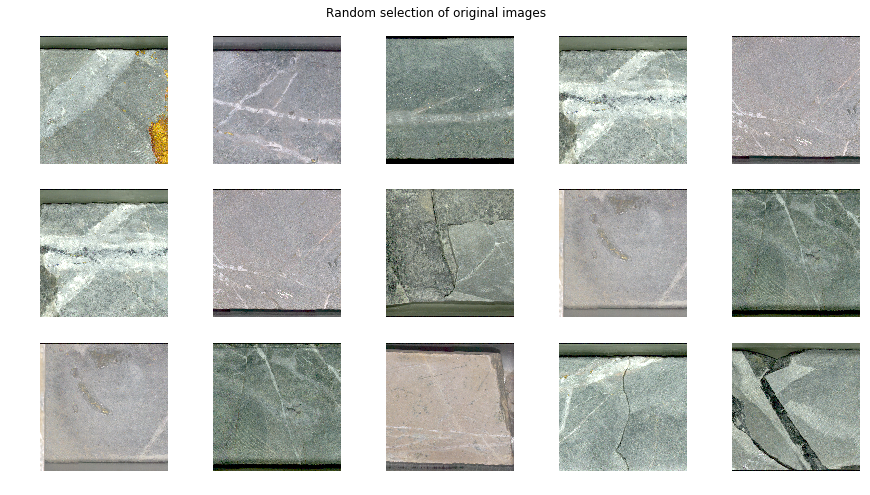

In [7]:
GRID_X = 5
GRID_Y = 3
f, axarr = plt.subplots(nrows=GRID_Y, ncols=GRID_X)
plt.suptitle("Random selection of original images", y=0.93)
f.set_figheight(8)
f.set_figwidth(15)
for x in range(GRID_X):
    for y in range(GRID_Y):
        axarr[y,x].axis('off')
        axarr[y,x].imshow(images[(y*GRID_Y)+x])

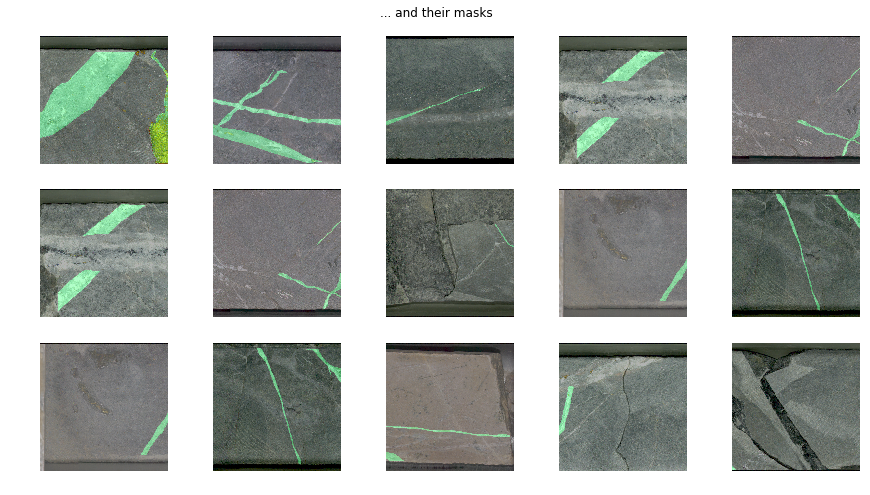

In [53]:
# plot all the masks for each segment, overlaying the original image
GRID_X = 5
GRID_Y = 3

IMAGE_EDGE_LENGTH = 1300
NUMBER_OF_IMAGE_CHANNELS = 3
NUMBER_OF_MASK_CHANNELS = 1

f, axarr = plt.subplots(nrows=GRID_Y, ncols=GRID_X)
plt.suptitle("... and their masks", y=0.93)
f.set_figheight(8)
f.set_figwidth(15)
for x in range(GRID_X):
    for y in range(GRID_Y):
        axarr[y,x].axis('off')
        original_image_name = image_names[(y*GRID_Y)+x]
        image = imageio.imread(original_image_name).astype(np.uint8)
        original_image_base_name = os.path.basename(original_image_name)
        name_split = original_image_base_name.split("_")
        name_split[name_split.index('inst')+1] = '*'
        name_wildcard = '_'.join(name_split)
        # for this segment, load all the instance masks and overlay them onto the original image
        instance_mask_file_list = glob.glob("{}/masks/{}".format(augmented_directory, name_wildcard))
        mask_aggregate = np.zeros((IMAGE_EDGE_LENGTH, IMAGE_EDGE_LENGTH, NUMBER_OF_IMAGE_CHANNELS), dtype=np.uint8)
        for instance_mask in instance_mask_file_list:
            base_mask = imageio.imread(instance_mask).astype(np.uint8)
            r_mask = base_mask.copy()
            g_mask = base_mask.copy()
            b_mask = base_mask.copy()
            r_mask[base_mask.nonzero()] = 0
            g_mask[base_mask.nonzero()] = 255
            b_mask[base_mask.nonzero()] = 80
            
            new_base_mask = np.zeros((IMAGE_EDGE_LENGTH, IMAGE_EDGE_LENGTH, NUMBER_OF_IMAGE_CHANNELS), dtype=np.uint8)
            new_base_mask[:base_mask.shape[0],:base_mask.shape[1],0] = r_mask
            new_base_mask[:base_mask.shape[0],:base_mask.shape[1],1] = g_mask
            new_base_mask[:base_mask.shape[0],:base_mask.shape[1],2] = b_mask
            
            mask_aggregate |= new_base_mask
        axarr[y,x].imshow(image)
        axarr[y,x].imshow(mask_aggregate, alpha=0.3)

In [9]:
# pick a random selection of augmented images
import random
NUMBER_OF_AUGMENTED_IMAGES = 15
indexes = random.sample(range(len(image_file_list)), NUMBER_OF_AUGMENTED_IMAGES)

images = []
masks = []
for i in range(len(indexes)):
    image = imageio.imread(image_file_list[indexes[i]]).astype(np.uint8)
    images.append(image)
    mask = imageio.imread(mask_file_list[indexes[i]]).astype(np.uint8)
    masks.append(mask)

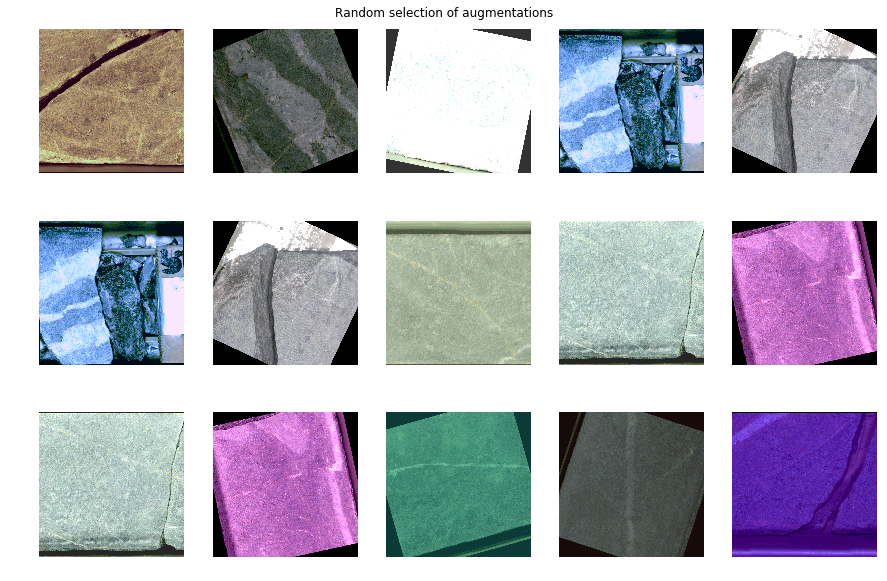

In [10]:
GRID_X = 5
GRID_Y = 3
f, axarr = plt.subplots(nrows=GRID_Y, ncols=GRID_X)
plt.suptitle("Random selection of augmentations", y=0.9)
f.set_figheight(10)
f.set_figwidth(15)
for x in range(GRID_X):
    for y in range(GRID_Y):
        axarr[y,x].axis('off')
        axarr[y,x].imshow(images[(y*GRID_Y)+x])

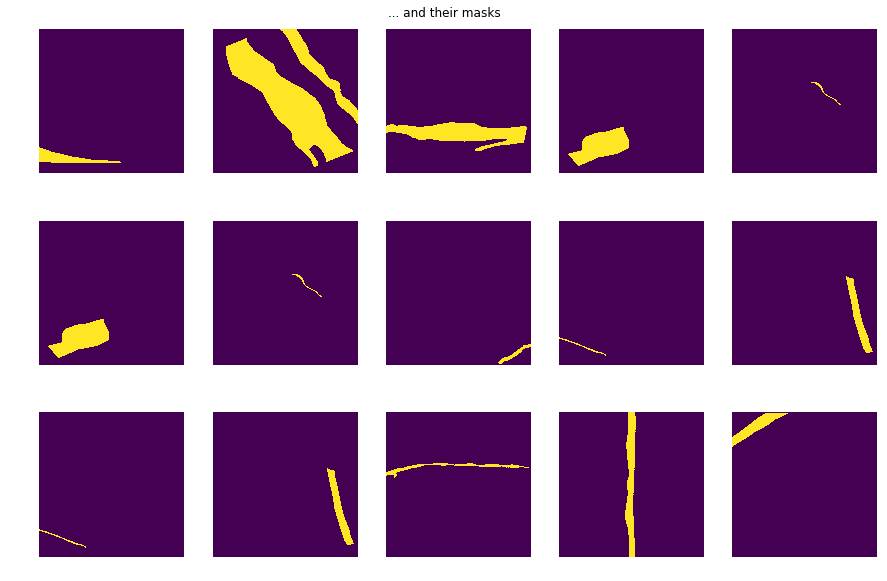

In [11]:
GRID_X = 5
GRID_Y = 3
f, axarr = plt.subplots(nrows=GRID_Y, ncols=GRID_X)
plt.suptitle("... and their masks", y=0.9)
f.set_figheight(10)
f.set_figwidth(15)
for x in range(GRID_X):
    for y in range(GRID_Y):
        axarr[y,x].axis('off')
        axarr[y,x].imshow(masks[(y*GRID_Y)+x])

### Original images

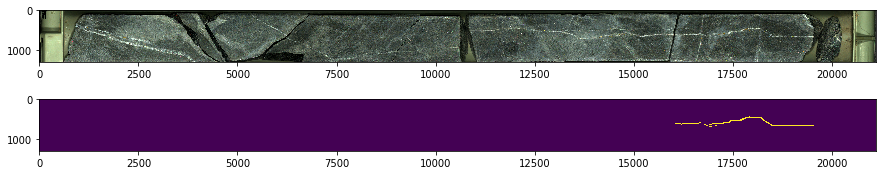

In [12]:
image = imageio.imread('/data/vein/labelbox_parsed/images/UE210_0064_01.png.4.png')
mask = imageio.imread('/data/vein/labelbox_parsed/masks/UE210_0064_01.png.4.png')
f, axarr = plt.subplots(nrows=2, ncols=1)
f.set_figheight(3)
f.set_figwidth(15)
_ = axarr[0].imshow(image)
_ = axarr[1].imshow(mask)